In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata


In [106]:
 
tweets_df = pd.read_csv('top_songs_with_lyrics.csv', encoding = 'latin1')

In [107]:
tweets_df.shape

(2041, 17)

In [15]:
tweets_df.describe

<bound method NDFrame.describe of         N¡                                            artists  explicit  \
0        1                                             MALUMA       NaN   
1        2  SECH, DADDY YANKEE, J BALVIN FEATURING ROSALIA...       1.0   
2        3              J BALVIN, DUA LIPA, BAD BUNNY & TAINY       NaN   
3        4                                              OZUNA       0.0   
4        5  NIO GARCIA X ANUEL AA X MYKE TOWERS X BRRAY X ...       NaN   
...    ...                                                ...       ...   
2036  2037                                 CONJUNTO PRIMAVERA       0.0   
2037  2038                                       JUAN GABRIEL       0.0   
2038  2039                             LOS CADETES DE LINARES       0.0   
2039  2040                                     TOO LIZARRAGA       0.0   
2040  2041                                     LOS TEMERARIOS       0.0   

                          genre  \
0                           Na

In [16]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N¡                     2041 non-null   int64  
 1   artists                2041 non-null   object 
 2   explicit               1500 non-null   float64
 3   genre                  1292 non-null   object 
 4   lyric                  1486 non-null   object 
 5   musixmatch_rating      1824 non-null   float64
 6   rank                   2041 non-null   int64  
 7   title                  2041 non-null   object 
 8   Violencia verbal       513 non-null    float64
 9   Violencia Fsica       513 non-null    float64
 10  Violencia Psicolgica  511 non-null    float64
 11  Violencia Sexual       512 non-null    float64
 12  VIolencia Econmica    512 non-null    float64
 13  Violencia Simblica    512 non-null    float64
 14  Apto para nixs        512 non-null    float64
 15  Obse

In [108]:
tweets_df = tweets_df[tweets_df['lyric'].isnull()==False]
tweets_df= tweets_df[tweets_df['clase'].isnull()== False]
tweets_df= tweets_df[['lyric','clase']]
tweets_df.head()


,lyric,clase
1,"Ahora todo cambi, le toca a ella\nLatino gang...",1.0
3,"Woh-oh-oh-oh (Dime, ma')\nBaby, baby\nOzuna\n\...",1.0
5,"Ovy On The Drums\nYa no te estaba buscando, ba...",0.0
6,"This is the rhythm, rhythm, rhythm, rhythm\nTh...",0.0
7,(SpongeBob SquarePants)\n(SpongeBob SquarePant...,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadfa6ed910>,
      dtype=object)

/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 146 missing 

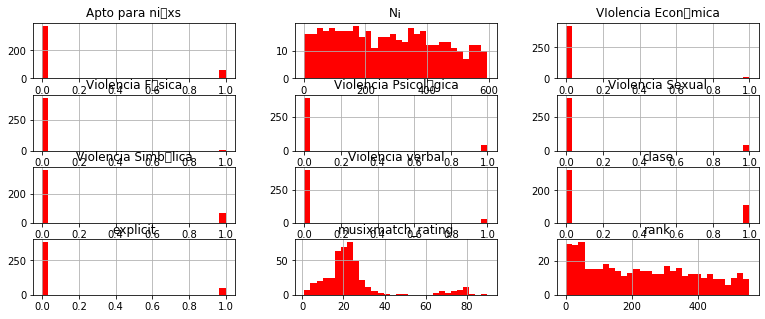

In [78]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [23]:
sns.countplot(tweets_df['klass'], label = 'Count')

KeyError: 'klass'

In [65]:
tweets_df['length'] = tweets_df['text'].apply(len)
tweets_df

,id,klass,text,length
0,1868,0,Que putas se supone que haga si Sam S y coldpl...,137
1,20,0,"#NoEsPosibleQue yo vuleva a caer dos veces , n...",77
2,7312,0,Se pasaron de verga la cague muy feo en el gol...,63
3,4441,0,me recomendó mucho este libro de fotos sobre l...,106
4,3399,1,HIJOS DE LA CHINGADA PARA SUS PUTOS FESTIVALES...,115
...,...,...,...,...
5384,1491,1,"Virtudes de los políticos;Idiotas,Rateros,Sin ...",139
5385,73,0,@USUARIO @USUARIO El video es tomado en la cal...,106
5386,5340,1,Los maestros siempre vienen conmigo a hablar m...,140
5387,4746,0,Tiran a dar como un puñal tus palabras en mi o...,140


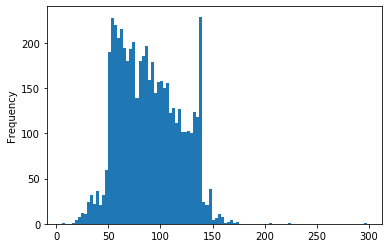

In [66]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [67]:
tweets_df.describe()

,id,klass,length
count,5389.000000,5389.000000,5389.000000
mean,3828.973093,0.354240,89.242717
std,2224.543019,0.478327,29.502949
min,1.000000,0.000000,6.000000
25%,1896.000000,0.000000,65.000000
50%,3820.000000,0.000000,86.000000
75%,5771.000000,1.000000,112.000000
max,7699.000000,1.000000,298.000000


In [68]:
tweets_df[tweets_df['length'] == 89]['text'].iloc[0]

'AXE hace autostop en pelota picada para lanzar su fragancia más loca: "Leather + Cookies"'

In [109]:
positive = tweets_df[tweets_df['clase']==0]
positive

,lyric,clase
5,"Ovy On The Drums\nYa no te estaba buscando, ba...",0.0
6,"This is the rhythm, rhythm, rhythm, rhythm\nTh...",0.0
7,(SpongeBob SquarePants)\n(SpongeBob SquarePant...,0.0
10,"Pocas amistades, a la ms sincera la llevo en ...",0.0
13,"Cosa' de familia, no la' tienen que escucha'\n...",0.0
...,...,...
581,Uuuyyyy zapateale bonito y sequele polvadera\n...,0.0
587,T eres mi amor consentido\nLa que me hace so...,0.0
588,"Me das un beso\nEn el cachete, esta vez\nPara ...",0.0
591,"Cuando te veo venir, te acercas a mi,\nQuiero ...",0.0


In [110]:
negative = tweets_df[tweets_df['clase']==1]
negative

,lyric,clase
1,"Ahora todo cambi, le toca a ella\nLatino gang...",1.0
3,"Woh-oh-oh-oh (Dime, ma')\nBaby, baby\nOzuna\n\...",1.0
8,Ah-ah-ah-oh-oh-oh\nAh-ah-ah-oh-oh\nYeah-eh\nAh...,1.0
9,"Baby, ven conmigo (ven conmigo)\nBaila (baila)...",1.0
14,A ella ya no le motiva salir\nQued traumada\n...,1.0
...,...,...
575,"Uy, uy, uy chiquitita\nY como duele oiga\nÀPor...",1.0
582,Hola\nÀQu tal? Te propongo algo\nHace tiempo ...,1.0
583,Hoy vengo aqu a molestarla\nPara pedirle un c...,1.0
586,Como puedo hacer para que entiendas\nQue por t...,1.0


In [111]:
import string
string.punctuation
import nltk # Natural Language tool kit 

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leobardomorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [112]:
## Agregar Lematizacion o Stemming 
## Agregar remover acentos 
## completar lista de stop words 

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]
    #
    return Test_punc_removed_join_clean

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [113]:
sentences = tweets_df['lyric'].tolist()
sentences_as_one_string = " ".join(sentences)


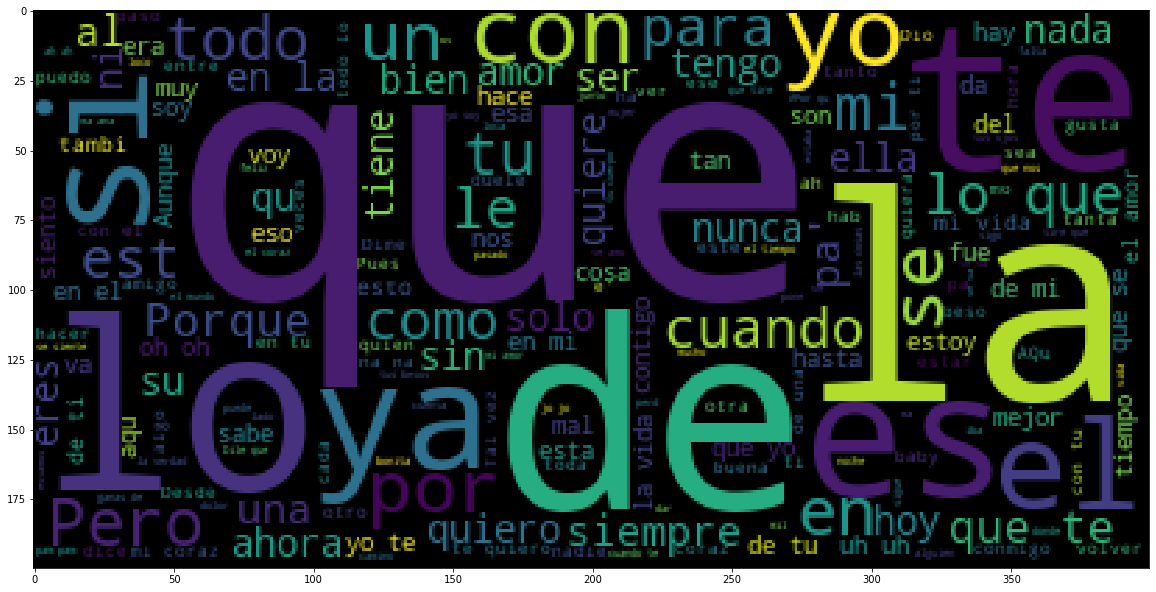

In [114]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

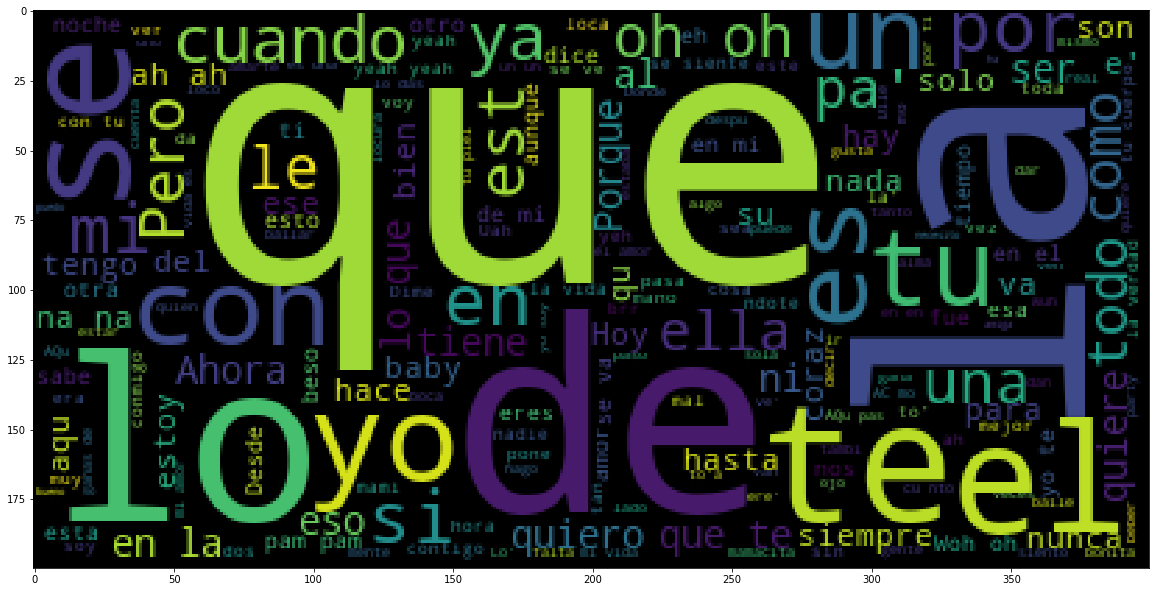

In [44]:
negative_list = negative['lyric'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leobardomorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [115]:
tweets_df_clean = tweets_df['lyric'].apply(message_cleaning)

In [116]:
tweets_df_clean

1      [Ahora, cambi, toca, Latino, gang, Ayer, vi, ...
3      [Wohohohoh, Dime, ma, Baby, baby, Ozuna, Aunqu...
5      [Ovy, On, The, Drums, buscando, babe, coincidi...
6      [This, is, the, rhythm, rhythm, rhythm, rhythm...
7      [SpongeBob, SquarePants, SpongeBob, SquarePant...
                             ...                        
587    [T, amor, consentido, hace, soar, ojos, boni...
588    [das, beso, cachete, vez, volver, ser, amigos,...
591    [veo, venir, acercas, Quiero, besar, boca, emp...
592    [pasa, chavela, noto, cansada, pasa, chavela, ...
595    [ADnde, quedaron, Todas, aquellas, promesas, ...
Name: lyric, Length: 434, dtype: object

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['lyric'])

In [118]:
print(vectorizer.get_feature_names())

['1', '10', '100', '15', '16', '20', '21', '29', '3', '45', '69', 'AA', 'AAh', 'AApoco', 'AAs\x92', 'AAy', 'ABlep', 'ACon', 'ACuando', 'ACu\x87les', 'ACu\x87ndo', 'ACu\x87ntas', 'ACu\x87nto', 'ACu\x87ntos', 'AC\x87llate', 'AC\x97mo', 'ADaddy', 'ADe', 'ADime', 'ADuro', 'AD\x97nde', 'AEl', 'AEn', 'AFarru', 'AFea', 'AHace', 'AHey', 'AJunto', 'AJ\x87lese', 'AMe', 'ANacho', 'AOh', 'APa', 'APara', 'APero', 'APor', 'APrende', 'AQue', 'AQui\x8en', 'AQu\x8e', 'AR\x9cmbale', 'ASalucita', 'ASalud', 'ASe', 'ASer\x87', 'ASube', 'ATamos', 'ATar\x8e', 'AT\x9c', 'AVas', 'AVerdad', 'AY', 'Aacaso', 'Aay', 'Abayarde', 'Abranle', 'Abusa', 'Aceptalo', 'Aclaremos', 'Acomp\x87\x96ame', 'Acordando', 'Acostumbrado', 'Acostumbr\x87ndome', 'Acura', 'Ac\x87', 'Ac\x97mo', 'Adale', 'Adentro', 'Adida', 'Admitelo', 'Adoro', 'Aduro', 'Ad\x87n', 'Afortunado', 'Agradecido', 'Agradezco', 'Agua', 'Agu\x87ntate', 'Ah', 'Ahah', 'Ahahah', 'Ahahahohoh', 'Ahahahohohoh', 'Ahahahyayayo', 'Ahora', 'Ah\x92', 'Alann', 'Alaska', 'Al

In [119]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:

tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [121]:
X = tweets

In [122]:
X.shape
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5809,5810,5811,5812,5813,5814,5815,5816,5817,5818
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:

y=tweets_df['clase']


In [124]:
y.shape

(434,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
## Utilizar otros sklearn log reg, SVM, XGBoost, Bin Tree, Random Forest

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

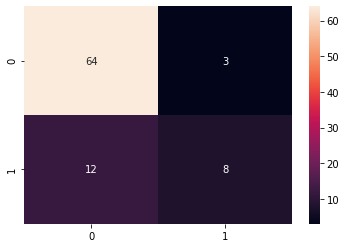

In [128]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [129]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90        67
         1.0       0.73      0.40      0.52        20

    accuracy                           0.83        87
   macro avg       0.78      0.68      0.71        87
weighted avg       0.82      0.83      0.81        87

